In [172]:
%matplotlib inline

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import odeint

In [247]:
class nPendulum:
    
    def __init__(self,M_array,L_array,g = 1):
    
        self.M_array = M_array
        self.L_array = L_array
        self.g = g
        
        self.N = len(M_array)
        
        print(self.N)
        
    def sigma(self,j,k):
        
        if j > k:
            
            return 0
        
        elif j <= k:
            
            return 1
        
    def invDelta(self,j,k):
        
        if j != k:
            
            return 1
        
        elif j == k:
            
            return 0
        
    def Euler_Lagrange(self,Phi_dDot,Phi,Phi_Dot):
        
        '''
        Equations of motion for nPendulum found at: https://arxiv.org/pdf/1910.12610.pdf
        '''
        
        ELeqns = np.zeros(self.N)
        
        for j in range(self.N):
            for k in range(self.N):
            
                ELeqns[j] += self.g * self.L_array[j] * np.sin(Phi[j]) * self.M_array[k] * self.sigma(j,k)
                
                ELeqns[j] += self.M_array[k] * self.L_array[j]**2 * Phi_dDot[j] * self.sigma(j,k)
                
                ELeqns[j] += np.sum( [ self.M_array[q] * self.sigma(j,q) for q in range(k,self.N) ] ) \
                            * self.L_array[j] * self.L_array[k] \
                            * np.sin(Phi[j] - Phi[k]) \
                            * Phi_Dot[j] \
                            * Phi_Dot[k]
                
                ELeqns[j] += np.sum( [ self.M_array[q] * self.sigma(j,q) for q in range(k,self.N) ] ) \
                            * self.L_array[j] * self.L_array[k] \
                            * (np.sin(Phi[k] - Phi[j]) * (Phi_Dot[j] - Phi_Dot[k]) * Phi_Dot[k]
                            + self.invDelta(j,k) * np.cos(Phi[j] - Phi[k]) * Phi_dDot[k])
        
        return ELeqns
        
        
    def dy_dt(self,y,t):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        for nPendulum an optimization is done to decouple the odes
        
        Parameters
        ----------
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        Phi_dDot_0 = np.zeros(self.N) 
        
        
        
        d2Phi_dt2 = opt.fsolve(self.Euler_Lagrange, Phi_dDot_0,
                               args = (y[:self.N],
                                       y[self.N:2*self.N]))
        
        
        
        output = np.zeros(2*self.N)
        output[:self.N] = y[self.N:2*self.N]
        output[self.N:2*self.N] = d2Phi_dt2
        
        
        return output
    
    
    def solve_ode(self, t_pts, Phi_0, Phi_Dot_0, 
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given the array of time points and initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y0 = np.zeros(2*self.N)
        y0[:self.N] = Phi_0
        y0[self.N:2*self.N] = Phi_Dot_0 
        
        y = odeint(self.dy_dt, y0, t_pts, 
                              atol=abserr, rtol=relerr).T
        
        
        return y[:self.N], y[self.N:2*self.N]
    
    def timeHistoryPlot(self,t_pts,Phi_0,Phi_Dot_0):
        
        Phi, Phi_Dot = self.solve_ode(t_pts,Phi_0,Phi_Dot_0)
        
        print(rf'Pendulum Parameters:')
        print(rf'         g constant: ', self.g)
        print(rf'             masses:', self.M_array)
        print(rf'            lengths:', self.L_array)
        
        fig = []
        axes = []
        
        for i in range(self.N):
            fig.append(plt.figure())
            axes.append(fig[i].add_subplot(self.N,1,i+1))
                        
            axes[i].plot(t_pts,Phi[i])
            
            axes[i].set_title(rf'$\phi_{i+1}$(0) = {Phi_0[i]}; $\dot\phi_{i+1}$(0) = {Phi_Dot_0[i]}')
            axes[i].set_xlabel(rf't')
            axes[i].set_ylabel(rf'$\phi_{i+1}$(t)')
            
                     
            fig[i].show()
        
        
        

In [257]:
# set the pendulum parameters
M_array = [1,1]
L_array = [1,1]

p2 = nPendulum(M_array,L_array)

2


# Small Angle Plots

Pendulum Parameters:
         g constant:  1
             masses: [1, 1]
            lengths: [1, 1]


/var/folders/dw/5lg3nzxx07q4c_kq8xxktcm40000gp/T/ipykernel_70781/340178658.py:130: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig[i].show()


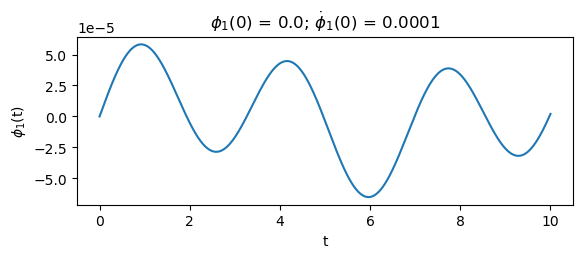

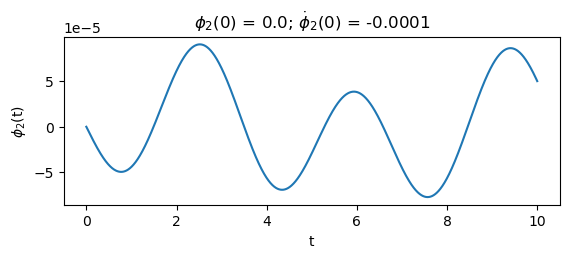

In [267]:
# Set the time interval
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions specified
phi_0 = np.array([0.0,0.0])
phi_dot_0 = np.array([0.0001,-0.0001])

phi, phi_dot = p2.solve_ode(t_pts, phi_0,phi_dot_0)
p2.timeHistoryPlot(t_pts,phi_0,phi_dot_0)

# Proof of Chaos

Pendulum Parameters:
         g constant:  1
             masses: [1, 1]
            lengths: [1, 1]


/var/folders/dw/5lg3nzxx07q4c_kq8xxktcm40000gp/T/ipykernel_70781/340178658.py:130: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig[i].show()


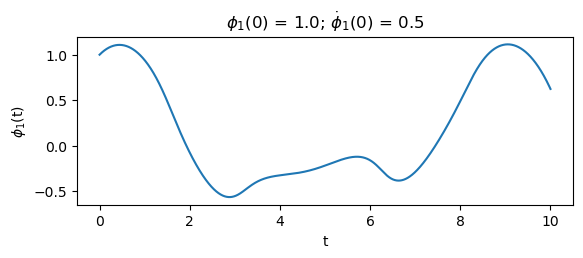

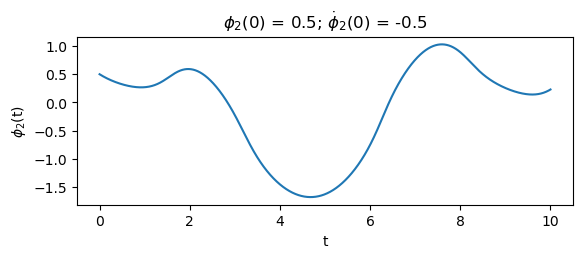

In [268]:
# Set the time interval
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions specified
phi_0 = np.array([1.0,0.5])
phi_dot_0 = np.array([0.5,-0.5])

phi, phi_dot = p2.solve_ode(t_pts, phi_0,phi_dot_0)
p2.timeHistoryPlot(t_pts,phi_0,phi_dot_0)

Pendulum Parameters:
         g constant:  1
             masses: [1, 1]
            lengths: [1, 1]


/var/folders/dw/5lg3nzxx07q4c_kq8xxktcm40000gp/T/ipykernel_70781/340178658.py:130: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig[i].show()


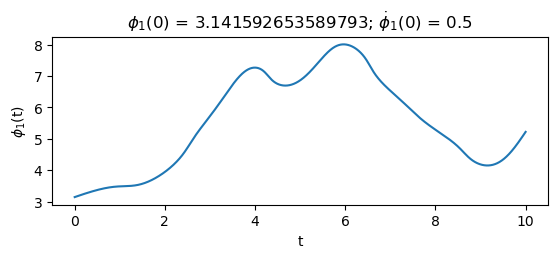

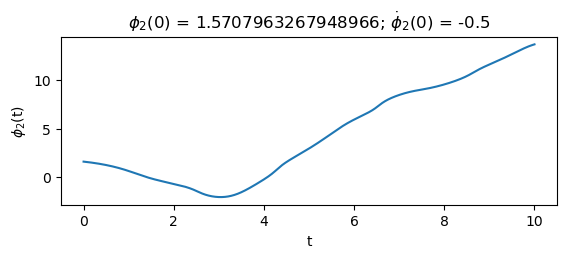

In [269]:
# Set the time interval
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions specified
phi_0 = np.array([np.pi,np.pi/2])
phi_dot_0 = np.array([0.5,-0.5])

phi, phi_dot = p2.solve_ode(t_pts, phi_0,phi_dot_0)
p2.timeHistoryPlot(t_pts,phi_0,phi_dot_0)

# 3-Pendulum

In [270]:
# set the pendulum parameters
M_array = [1,1,1]
L_array = [1,1,1]

p3 = nPendulum(M_array,L_array)

3


In [271]:
# Set the time interval
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions specified
phi_0 = np.array([np.pi,np.pi/2,-np.pi/4])
phi_dot_0 = np.array([0.5,-0.5,0.1])

phi, phi_dot = p2.solve_ode(t_pts, phi_0,phi_dot_0)
p2.timeHistoryPlot(t_pts,phi_0,phi_dot_0)

ValueError: could not broadcast input array from shape (3,) into shape (2,)